In [1]:
!pip install sqlalchemy

In [103]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Path to sqlite
database_path = "./Resources/hawaii.sqlite"

# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///{database_path}")

In [104]:
# Use the Inspector to explore the database and print the table names

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [105]:
# Use Inspector to print the column names and types

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [106]:
# Use Inspector to print the column names and types

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [107]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [108]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [109]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [110]:
# Assign the classes to a variables

Measurement = Base.classes.measurement
Station = Base.classes.station

In [117]:
# Create a session
session = Session(engine)

In [129]:
# using Pandas

import pandas as pd 

measurement_df = pd.DataFrame(session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all())
print(measurement_df)

station_df = pd.DataFrame(session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude,Station.elevation).all())
print(station_df)


# data_list = []
# for row in session.query(Measurement).all():
# #     print(row.__dict__)
#     data_list.append(row.__dict__)

          id      station        date  prcp  tobs
0          1  USC00519397  2010-01-01  0.08  65.0
1          2  USC00519397  2010-01-02  0.00  63.0
2          3  USC00519397  2010-01-03  0.00  74.0
3          4  USC00519397  2010-01-04  0.00  76.0
4          5  USC00519397  2010-01-06   NaN  73.0
...      ...          ...         ...   ...   ...
19545  19546  USC00516128  2017-08-19  0.09  71.0
19546  19547  USC00516128  2017-08-20   NaN  78.0
19547  19548  USC00516128  2017-08-21  0.56  76.0
19548  19549  USC00516128  2017-08-22  0.50  76.0
19549  19550  USC00516128  2017-08-23  0.45  76.0

[19550 rows x 5 columns]
   id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US  21.27160   
1   2  USC00513117                    KANEOHE 838.1, HI US  21.42340   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130   
3   4  USC00517948                       PEARL CITY, HI US  21.39340   
4   5  USC0051

# Precipitation Analysis

In [257]:
# To get most recent date
import datetime as dt
from datetime import datetime
import pandas as pd 

most_recent_date = measurement_df[['date']].max()
most_recent_date =pd.to_datetime(most_recent_date)
most_recent_date['date']

Timestamp('2017-08-23 00:00:00')

In [258]:
last_year_date = most_recent_date - pd.DateOffset(years=1)
last_year_date = str(last_year_date['date'])
last_year_date

'2016-08-23 00:00:00'

In [333]:
data_between_dates_df = measurement_df[(measurement_df['date'] >= last_year_date) & (measurement_df['date'] <= str(most_recent_date))]
data_between_dates_df = data_between_dates_df[['date','prcp']]
data_between_dates_df = data_between_dates_df.dropna()

In [334]:
# data_between_dates_df.sort_values('date')
data_between_dates_df.set_index('date', inplace=True)

In [335]:
groupby_df = data_between_dates_df.groupby('date')['prcp'].sum()
groupby_df

date
2016-08-24    9.33
2016-08-25    0.54
2016-08-26    0.10
2016-08-27    0.32
2016-08-28    3.10
              ... 
2017-08-19    0.09
2017-08-20    0.01
2017-08-21    0.58
2017-08-22    0.50
2017-08-23    0.53
Name: prcp, Length: 365, dtype: float64

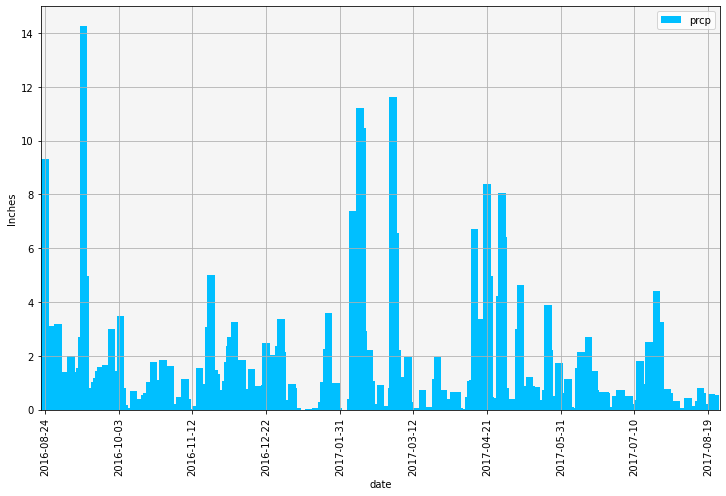

In [336]:
# Plot the Results in a Matplotlib bar chart
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

ax = groupby_df.plot.bar(figsize=(10,7),width = 4, color='deepskyblue')
plt.xticks(np.arange(0,len(df),40))
plt.tight_layout()
plt.grid()
plt.legend()
plt.ylabel('Inches')
ax.set_facecolor('whitesmoke')
plt.show()

In [128]:
session.commit()